# Metricas de Regresión

In [ ]:
# conjunto de datos
from sklearn.datasets import make_regression
X, y = make_regression(n_samples = 1000, n_features =1, n_informative = 1, noise=10)


Text(0, 0.5, 'label')

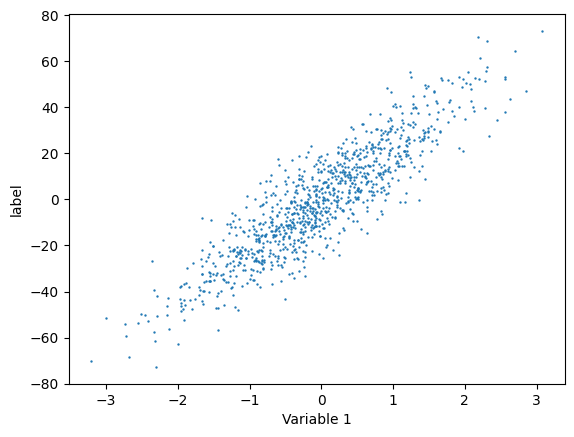

In [ ]:
# gráfico del conjunto de datos
import matplotlib.pyplot as plt

plt.scatter(X, y, s=0.5)
plt.xlabel("Variable 1")# X, predictor, dimension, caracteristica, feature
plt.ylabel("label") # y, target, variable objetivo, label

In [ ]:
#dividir los datos en conjunto de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25)

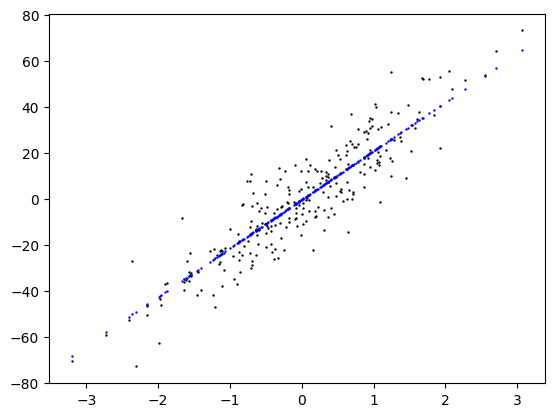

In [ ]:
from sklearn.linear_model import LinearRegression
reg_lr = LinearRegression() # paramétrico
y_pred = reg_lr.fit(X_train, y_train).predict(X_test)

#plot
plt.scatter(X_test, y_test, color = 'black', s=0.5)
plt.scatter(X_test, y_pred, color = 'blue', s=0.5)

In [ ]:
# implementación de cero de la métrica MAE
import numpy as np

print("nuestra implementación de MAE {}".format(np.sum(np.abs(y_pred-y_test))/len(y_test)))

#implementación con el sklearn
from sklearn.metrics import mean_absolute_error
print("implementación sklearn de MAE {}".format(mean_absolute_error(y_pred, y_test)))

nuestra implementación de MAE 8.40770946431412
implementación sklearn de MAE 8.40770946431412


In [ ]:
# implementación de cero de la métrica MSE
import numpy as np
print("nuestra implementación de MSE {}".format(np.sum(np.square(y_pred-y_test))/len(y_test)))

#implementación con el sklearn
from sklearn.metrics import mean_squared_error
print("implementación sklearn de MSE {}".format(mean_squared_error(y_pred, y_test)))

nuestra implementación de MSE 112.19834151685255
implementación sklearn de MSE 112.19834151685255


In [ ]:
# implementación de cero de la métrica RMSE
import numpy as np
print("nuestra implementación de RMSE {}".format(np.sqrt(np.sum(np.square(y_pred-y_test))/len(y_test))))

#implementación con el sklearn
from sklearn.metrics import mean_squared_error
print("implementación sklearn de RMSE {}".format(mean_squared_error(y_pred, y_test, squared=False)))

nuestra implementación de RMSE 10.592371855106512
implementación sklearn de RMSE 10.592371855106512


# Métricas de clasificación

In [ ]:
import numpy as np
# 1 es positive, 0 es negative

# valores observados (etiqueta actual), valores que tenemos acceso
y_test = np.array([1,1,0,0,0,0,1,1,0,0,0,0,0,0])

#valores que el clasifidor predice
# y_pred = model.fit(X_train, y_train).predict(X_test)
# [0.9,0.7,0.1,0.4,1,0.65,0.7,0.03,0.0004,0.9,0.1,0.003,0.99,0.011]>=0.5
y_pred = np.array([1,1,0,0,1,1,1,0,0,1,0,0,1,0])

# y_pred para in valor de corte de 0.5 :  (if y'>=0.5 -> 1 else 0)
# np.array([0.9,0.7,0.1,0.4,1,0.65,0.7,0.03,0.0004,0.9,0.1,0.003,0.99,0.011])>=0.5
# el valor de corte (threshold) es 0.5

In [ ]:
# matriz de confusión

TP = np.sum(y_test & y_pred)
TN = np.sum((1-y_test) & (1-y_pred))
FP = sum((y_pred - y_test) == 1)
FN = sum((y_pred - y_test) == -1)

M = np.array([[TN,FP ],[FN, TP]])

print("nuestra implementación de matriz de confusión \n ",M)

from sklearn.metrics import confusion_matrix
print("implementación de matriz confusión sklearn: \n",confusion_matrix(y_test, y_pred))

nuestra implementación de matriz de confusión 
  [[6 4]
 [1 3]]
implementación de matriz confusión sklearn: 
 [[6 4]
 [1 3]]


In [ ]:
# accuracy
print("nuestra implementación de accuracy:",  (TP+TN)/(TP+TN+FP+FN))

from sklearn.metrics import accuracy_score
print("implementación de sklearn accuracy", accuracy_score(y_test, y_pred))

nuestra implementación de accuracy: 0.6428571428571429
implementación de sklearn accuracy 0.6428571428571429


In [ ]:
# presición
print("nuestra implementación de presicion:", TP/(TP+FP))

from sklearn.metrics import precision_score
print("implementación de sklearn presicion", precision_score(y_test, y_pred))

nuestra implementación de presicion: 0.42857142857142855
implementación de sklearn presicion 0.42857142857142855


In [ ]:
# recall
print("nuestra implementación de recall:", TP/(TP+FN))

from sklearn.metrics import recall_score
print("implementación de sklearn recall", recall_score(y_test, y_pred))

nuestra implementación de recall: 0.75
implementación de sklearn recall 0.75


In [ ]:
# score F1
from sklearn.metrics import f1_score
print("implementación de sklearn f1", f1_score(y_test, y_pred))

implementación de sklearn f1 0.5454545454545454


In [ ]:
# reporte completo
from sklearn.metrics import classification_report

target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.86      0.60      0.71        10
     class 1       0.43      0.75      0.55         4

    accuracy                           0.64        14
   macro avg       0.64      0.68      0.63        14
weighted avg       0.73      0.64      0.66        14



### Curvas Presicion-recall

In [ ]:
# conjunto de datos artificial
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=2,  n_informative=2, n_redundant=0)

# dividir los datos en conjuntos entrenamiento - prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25)

# definir las máquinas de aprendizaje (machine learning models)
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression()

#obtener los scores
scores = clf_lr.fit(X_train,y_train).predict_proba(X_test)[:,1]

In [ ]:
low = min(scores)
high = max(scores)

step = (low+high)/1000

threshold = np.arange(low, high,step)
threshold

list_presicion = []
list_tpr = [] # True positive rate (TPR) es lo mismo que recall

for th in threshold:
  # scores >= th
  y_pred =   np.array([1 if s > th else 0  for s in scores])

  # matriz de confusión
  TP = np.sum(y_test & y_pred)
  TN = np.sum((1-y_test) & (1-y_pred))
  FP = sum((y_pred - y_test) == 1)
  FN = sum((y_pred - y_test) == -1)

  #
  list_presicion.append(TP/(TP+FP))
  list_tpr.append(TP/(TP+FN))

  # sklearn version (linha 16-24 se puede reemplazar por )
  #list_presicion.append(precision_score(y_test, y_pred))
  #list_tpr.append(recall_score(y_test, y_pred))


Text(0, 0.5, 'Presicion')

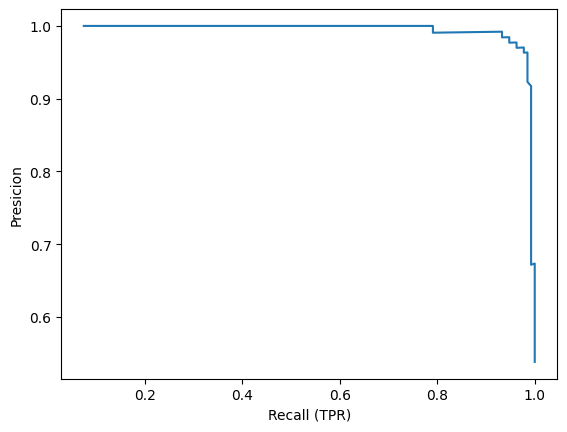

In [ ]:
import matplotlib.pyplot as plt

plt.plot(list_tpr, list_presicion)
plt.xlabel('Recall (TPR)')
plt.ylabel('Presicion')

In [ ]:
# usando presicion_recall_curve de sklearn
from sklearn.metrics import precision_recall_curve

precision_recall_curve()



In [ ]:
import numpy as np
from sklearn.metrics import precision_recall_curve
y_true = np.array([0, 0, 1, 1])
y_scores = np.array([0.1, 0.4, 0.35, 0.8])

precision, recall, thresholds = precision_recall_curve(y_test, scores)



In [ ]:
thresholds

array([2.83925757e-04, 2.97698605e-04, 3.69698898e-04, 5.50013488e-04,
       5.53036270e-04, 5.72001532e-04, 8.00909003e-04, 8.07251072e-04,
       1.28480782e-03, 1.34565474e-03, 1.35422666e-03, 1.35568579e-03,
       1.35690202e-03, 1.46150452e-03, 1.61427570e-03, 1.64388774e-03,
       1.71756469e-03, 1.96172329e-03, 1.96392415e-03, 2.04415662e-03,
       2.15145708e-03, 2.16633320e-03, 2.18389709e-03, 2.69841047e-03,
       2.79048020e-03, 3.35997659e-03, 4.26259955e-03, 4.26461239e-03,
       4.48400464e-03, 5.20017976e-03, 5.24837220e-03, 5.63469517e-03,
       6.28730542e-03, 7.41232488e-03, 7.56919589e-03, 7.75862154e-03,
       8.28341584e-03, 9.90879047e-03, 1.01468060e-02, 1.09460619e-02,
       1.10746305e-02, 1.18784342e-02, 1.19310251e-02, 1.32873971e-02,
       1.33100870e-02, 1.34047172e-02, 1.35520485e-02, 1.65595826e-02,
       1.69425954e-02, 1.76044885e-02, 1.78244486e-02, 1.91153742e-02,
       2.03999487e-02, 2.06653261e-02, 2.08726712e-02, 2.11318329e-02,
      